# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur à l'instant t d'obtenir une unité de récompense à l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [ ]:
def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

Nous nous trouvons dans le cas d'un PDM fini, l'équation de Bellman admet une unique solution indépendant de la politique. Nous allons utilisons utiliser la programmation dynamique pour trouver cet unique point fixe. A chaque itération, on applique l'équation de Bellman avec le vecteur $V_{\pi}$. On choisit le critère de convergence à un $\epsilon$ près.

In [ ]:
def valueIteration(eps,gamma,T,R):
    n_state = T.shape[0]
    n_action = R.shape[1]
    
    #Initilisation du vecteur des valeurs optimales de chaque état
    V = np.array([0]*n_state,dtype='float')   

    #compteur du nombre d'itérations
    cpt = 0
    while True:
        delta = 0
        cpt += 1

        #On enregistre les valeurs du vecteur avant la prochaine itération
        V_old = V.copy()

        for s in range(n_state):   
            S = np.zeros((n_action), dtype='float')
            for a in range(n_action):   
                for s_p in range(n_state):
                    #Somme des termes Tss'a x V(s') 
                    S[a] = S[a] + T[s,a,s_p]*V_old[s_p]
              
                S[a] = R[s,a] + gamma*S[a]

            V[s] = np.max(S)

        # On extrait la valeur absolue maximale des différences entre V et V_old
        delta = max(np.abs(V[s] - V_old[s]) for s in range(n_state))

        # Si cette valeur est inférieur à epsilon, on considère qu'on a convergé
        if (delta < eps):
            break

    
    print(f"Nombre Iterations :  {cpt}")
    return V


In [ ]:
w = valueIteration(1e-6, 0.9, T, R)
w
printV(w)

Nombre Iterations :  24
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


On remarque que l'on a converge à $\epsilon=$ 1e-6 près au bout de 24 itérations de l'algorithme itération sur les valeurs. Les valeurs des états sont cohérentes avec la position des objectifs et des pénalités.

In [ ]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

Ci-dessous voici les politiques

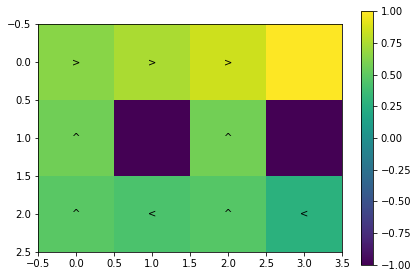

In [ ]:
plotBestPolicy(w, 0.9)

Vous pouvez modifier la matrice de récompenses pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débugger, vous pouvez dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


Nous maintenant essayer de retrouver les mêmes valeurs optimales mais on va cette fois-ci partir d'une politique arbitraire et on l'améliorer au fur et à mesure. Si on ne trouve plus d'amélioration, cela signifie que l'on a convergé vers les valeurs optimales pour tous les états.

On commence par définir une fonction qui va évaluer une politique donnée $\pi$ en renvoyant $V_{\pi}$. On choisit le critère de convergence à un $\epsilon$ près.

In [ ]:
def evaluation_politique(Vpi,policy,gamma,T,R,eps):
    n_state = T.shape[0]
    n_action = R.shape[1]

    while True:
                V_old = Vpi.copy()                
                for s in range(n_state):   
                    S_tot = 0
                    for a in range(n_action):   
                        S = 0
                        for s_p in range(n_state):
                            S += T[s,a,s_p]*V_old[s_p]
                        S = R[s,a] + gamma*S
                        S_tot += policy[s,a]*S

                    Vpi[s] = S_tot

                delta = max(np.abs(Vpi[s] - V_old[s]) for s in range(n_state))

                if (delta < eps):
                    break
    return Vpi


In [ ]:
from random import *

def policy_iteration(eps,gamma,T,R):
    n_state = T.shape[0]
    n_action = R.shape[1]

    Vpi = np.array([0]*n_state,dtype='float').reshape(-1)
    #Politique aléatoire
    policy = np.zeros((n_state,n_action))
    for s in range(n_state):
        idx = randint(0,3)
        policy[s,idx] = 1

    #Evaluation de la politique sur 1000 itérations
    for i in range(1000):

        print("Evaluation de la politique")

        Vpi = evaluation_politique(Vpi,policy,gamma,T,R,eps)    

        printV(Vpi)
        print("Amélioration de la politique")      

        #Amélioration de la politique
        meme_politique = True
        for s in range(n_state):
            old_policy = policy[s,:].copy()
            q = np.zeros((n_action), dtype='float').reshape(-1)

            for a in range(n_action):
                S = 0
                for s_p in range(n_state):
                    S += T[s,a,s_p]*Vpi[s_p]
                q[a] = R[s,a] + gamma*S

            #On choisit de manière "gloutonne" la meilleur action
            idx = np.argmax(q)

            policy[s,:] = np.zeros((n_action), dtype='float').reshape(-1)
            policy[s,idx] = 1

            if not np.array_equal(old_policy,policy[s,:]):
                meme_politique = False

        #Si on a exactement la même politique qu'à l'itération précédente,
        #on consière qu'on a convergé.s
        if meme_politique:
            print(f"Convergence en {i+1} itérations")
            break

    return Vpi,policy

Voici l'évolution des valeurs des états au fur et à mesure de l'itération sur les politiques :

Evaluation de la politique
| 0.13 | 0.16 | 0.37 | 1.00 |
| 0.05 | ---- | 0.20 | -1.0 |
| 0.02 | 0.01 | 0.07 | -0.78 |
Amélioration de la politique
Evaluation de la politique
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.42 | 0.47 | 0.28 |
Amélioration de la politique
Evaluation de la politique
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |
Amélioration de la politique
Convergence en 3 itérations


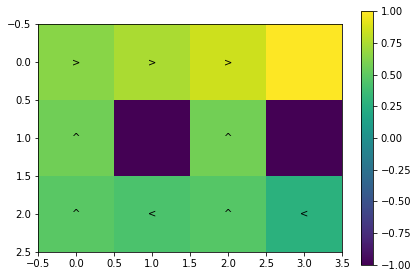

In [ ]:
Vpi,policy = policy_iteration(1e-6,0.9,T,R)
plotBestPolicy(Vpi, 0.9)

On remarque que l'on converge bien vers la même fonction de valeur optimale que l'algorithme Itération sur les valeurs. Il y a donc de très fortes probabilités que ce soit la fonction de valeure optimale.